In [ ]:
!pip install scipy --upgrade
!pip install networkx --upgrade
%pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 252 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 4.2 MB/s 
     |████████████████████████████████| 40 kB 6.0 MB/s 
     |████████████████████████████████| 1.6 MB 64.6 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=5233affc0841eadaf4ec0f0e01c75d8dfb8e40239dd98b2b1c3b6b4c3d0769fb
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyvis.network import Network

from networkx.algorithms import community
from networkx.algorithms import bipartite

In [ ]:
!gdown '1j50Yr2zA18_rGOvir70JSGaZofQwPKsL' -O organization.csv

Downloading...
From: https://drive.google.com/uc?id=1j50Yr2zA18_rGOvir70JSGaZofQwPKsL
To: /content/organization.csv
100% 234k/234k [00:00<00:00, 94.5MB/s]


## Input Data

In [ ]:
data=pd.read_csv('organization.csv')

In [ ]:
data.where(data['member'] == 'None').dropna(axis = 0, how = 'all')

,Organisation,member
1,ethereum,None
6,ethereum,None
17,ethereum,None
21,ethereum,None
27,ethereum,None
...,...,...
10540,microsoft,None
10551,microsoft,None
10557,microsoft,None
10568,microsoft,None


In [ ]:
data = data[data.member != 'None']
data

,Organisation,member
0,ethereum,Oleh Aldekein
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden
5,ethereum,Mihai Alisie
...,...,...
10592,microsoft,Chris Colborne
10593,microsoft,Zachary Danz
10594,microsoft,zsy
10595,microsoft,Zuhair Parvez


In [ ]:
count = data.groupby(['Organisation']).count().reset_index()
count

,Organisation,member
0,Azure,1616
1,NVIDIA,12
2,airbnb,25
3,ansible,47
4,apache,1078
5,atom,45
6,aws,168
7,babel,69
8,bitcoin,28
9,deepmind,19


## All data

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40527 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_

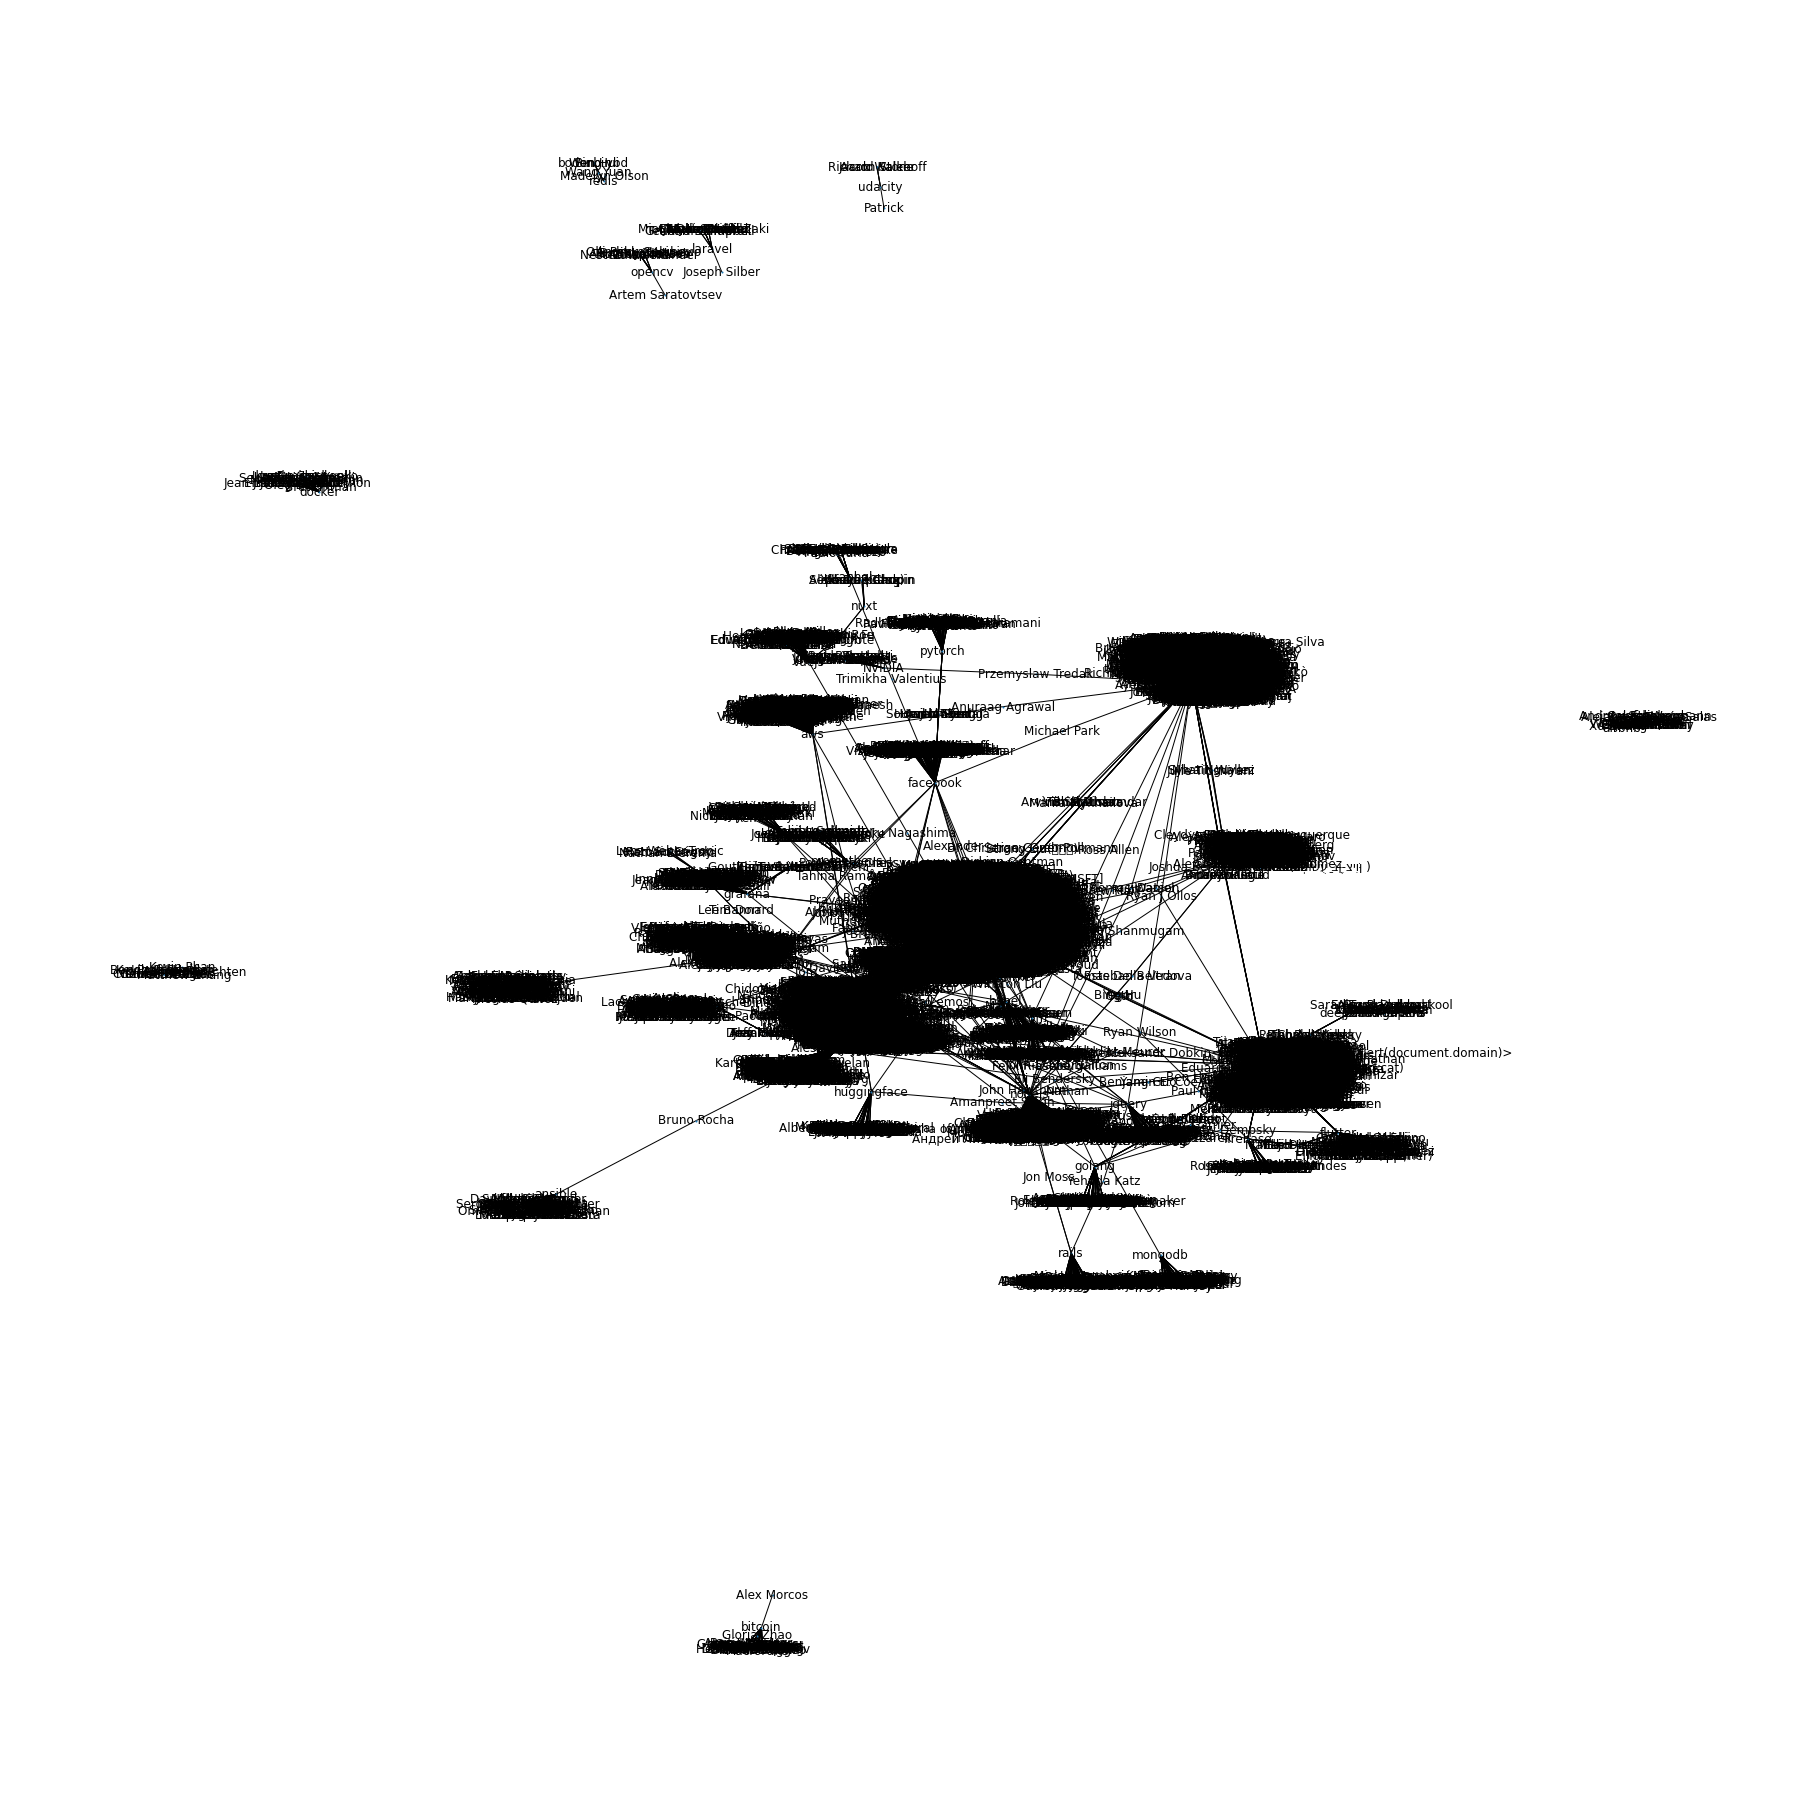

In [ ]:
B=nx.Graph()
B.add_nodes_from(data['Organisation'],bipartite=0)
B.add_nodes_from(data['member'],bipartite=1)
for i in range(len(data)):
  B.add_edges_from([(data.iloc[i,1],data.iloc[i,0])])
# nx.draw(B,with_labels=1)
plt.figure(figsize=(25,25))
nx.draw(B, with_labels=True, node_size=1)
plt.show()

In [ ]:
nt = Network(notebook=True, bgcolor='#3A3B3C', font_color='white')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [ ]:
nt.from_nx(B)
nt.toggle_physics(True)
nt.force_atlas_2based()
nt.toggle_physics(False)
nt.show_buttons(filter_=["physics"])
nt.show('all_data.html')

In [ ]:
nx.info(B)

<ipython-input-11-c70d834de35e>:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(B)


'Graph with 8919 nodes and 9629 edges'

## 500 Data

In [ ]:
data2 = data[:500]

In [ ]:
data2.reset_index()
data2

,Organisation,member
0,ethereum,Oleh Aldekein
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden
5,ethereum,Mihai Alisie
...,...,...
539,google,Pavel Sountsov
540,google,Chris Hawk
541,google,Sven May
542,google,Tianrun Li


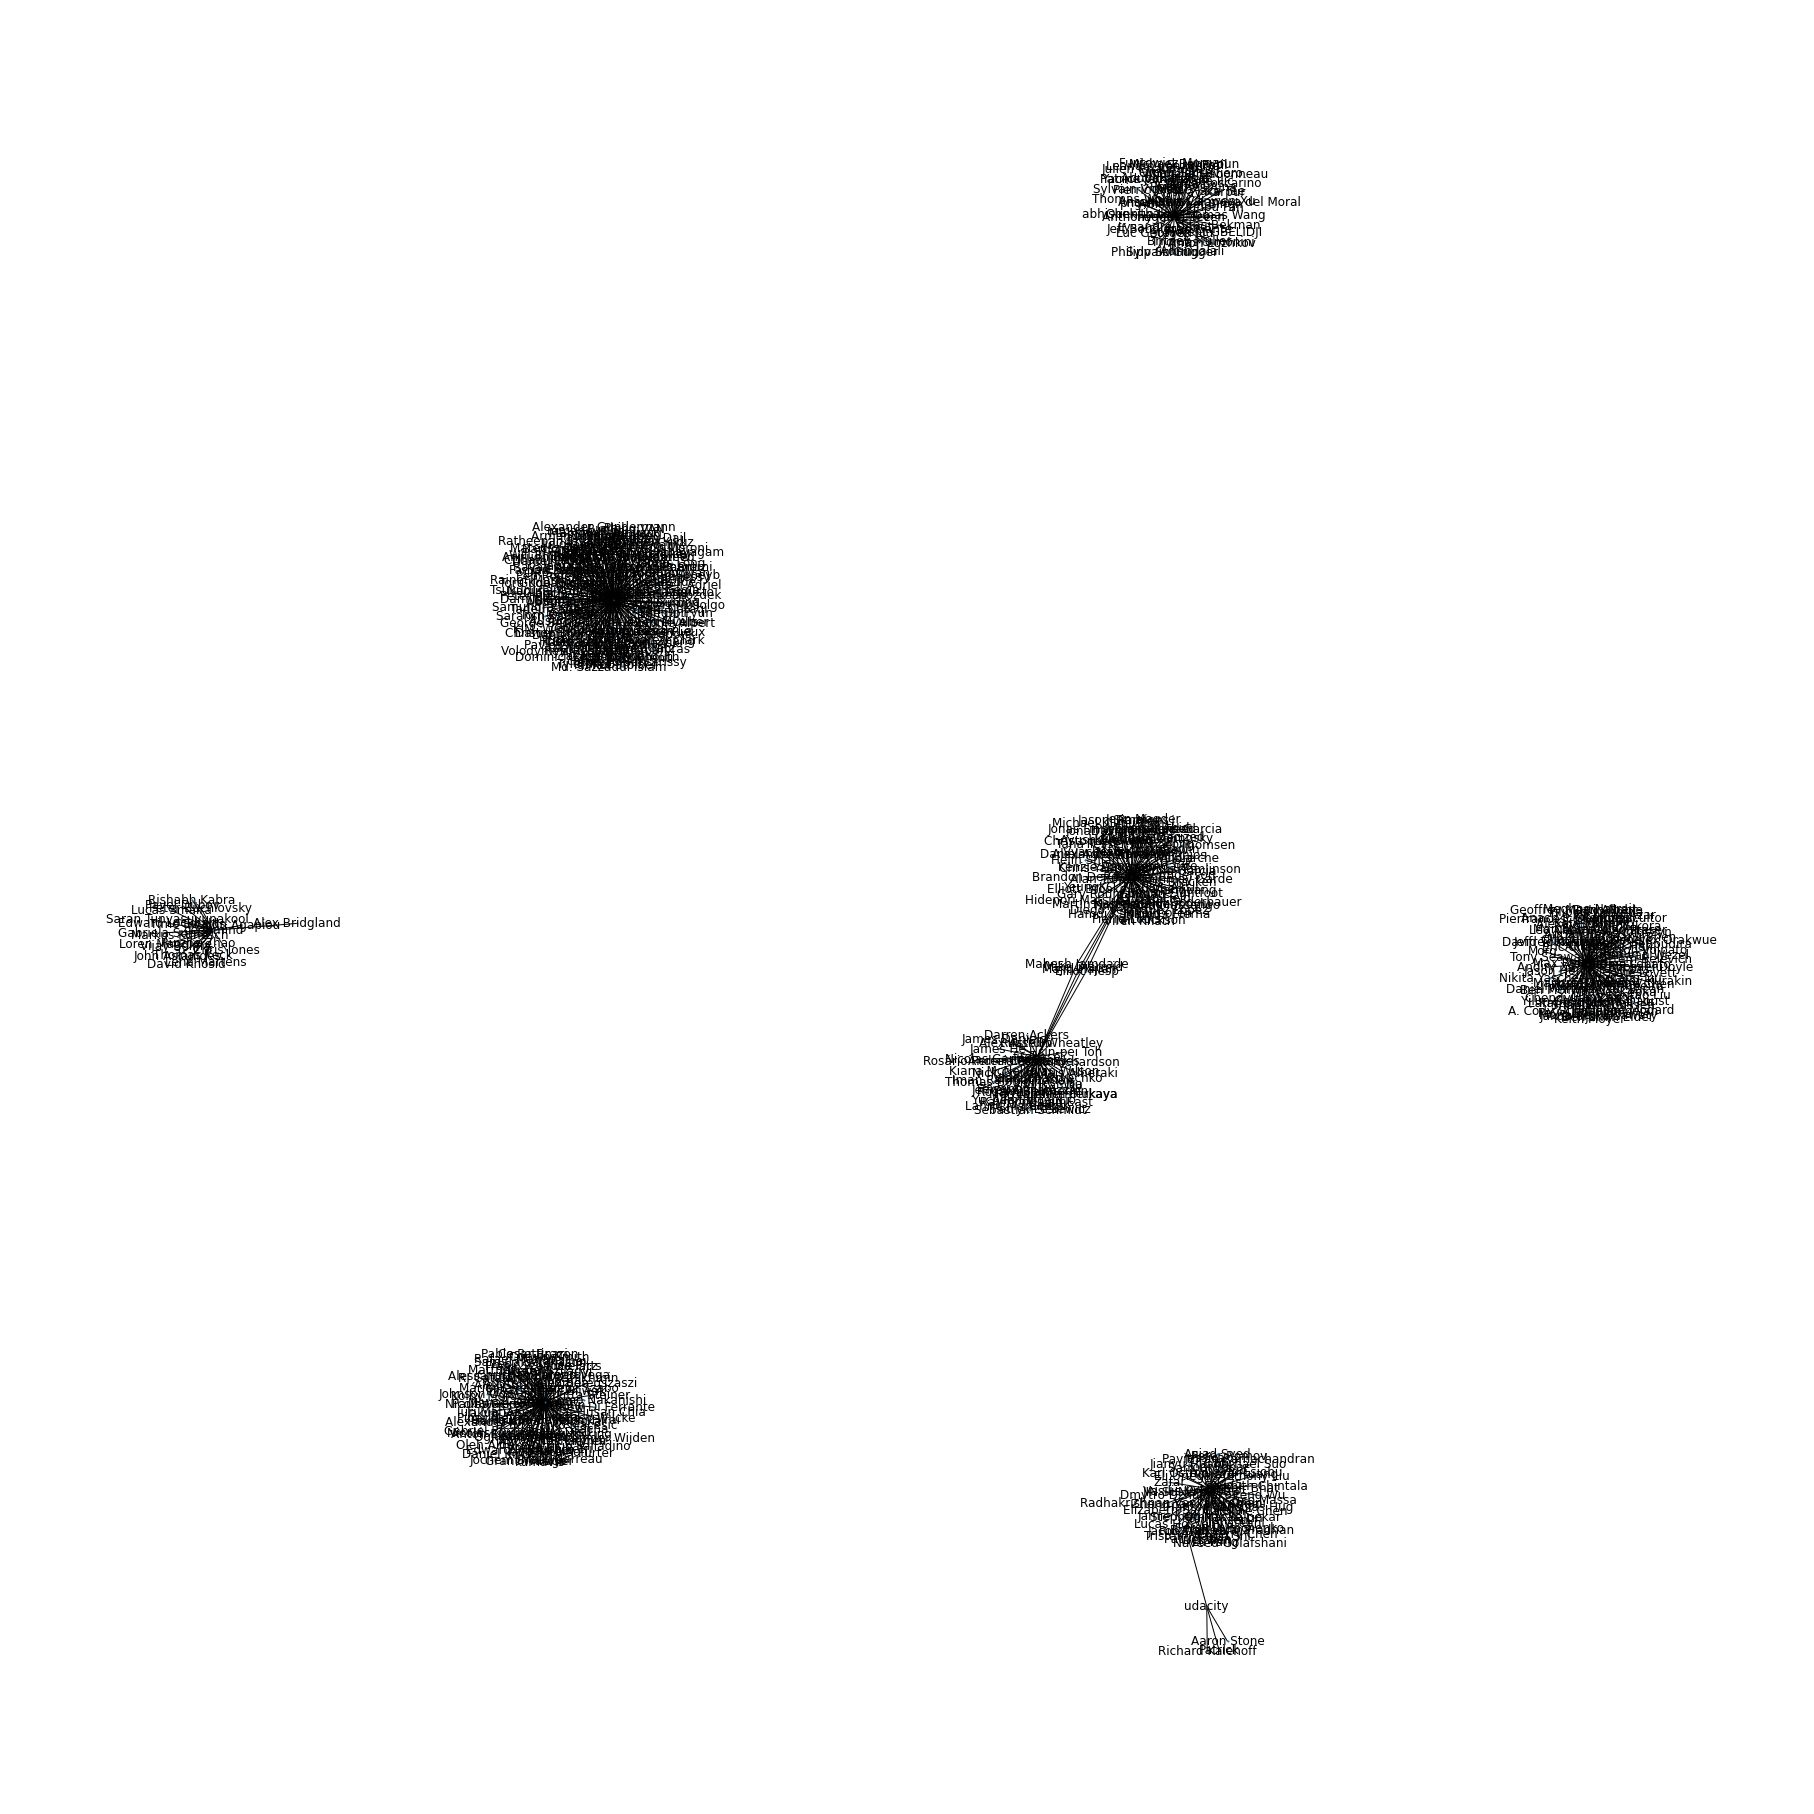

In [ ]:
graph2=nx.Graph()
graph2.add_nodes_from(data2['Organisation'],bipartite=0)
graph2.add_nodes_from(data2['member'],bipartite=1)
for i in range(len(data2)):
  print()
  graph2.add_edges_from([(data2.iloc[i,1],data2.iloc[i,0])])
# nx.draw(graph2,with_labels=1)
plt.figure(figsize=(25,25))
nx.draw(graph2, with_labels=True, node_size=1)
plt.show()

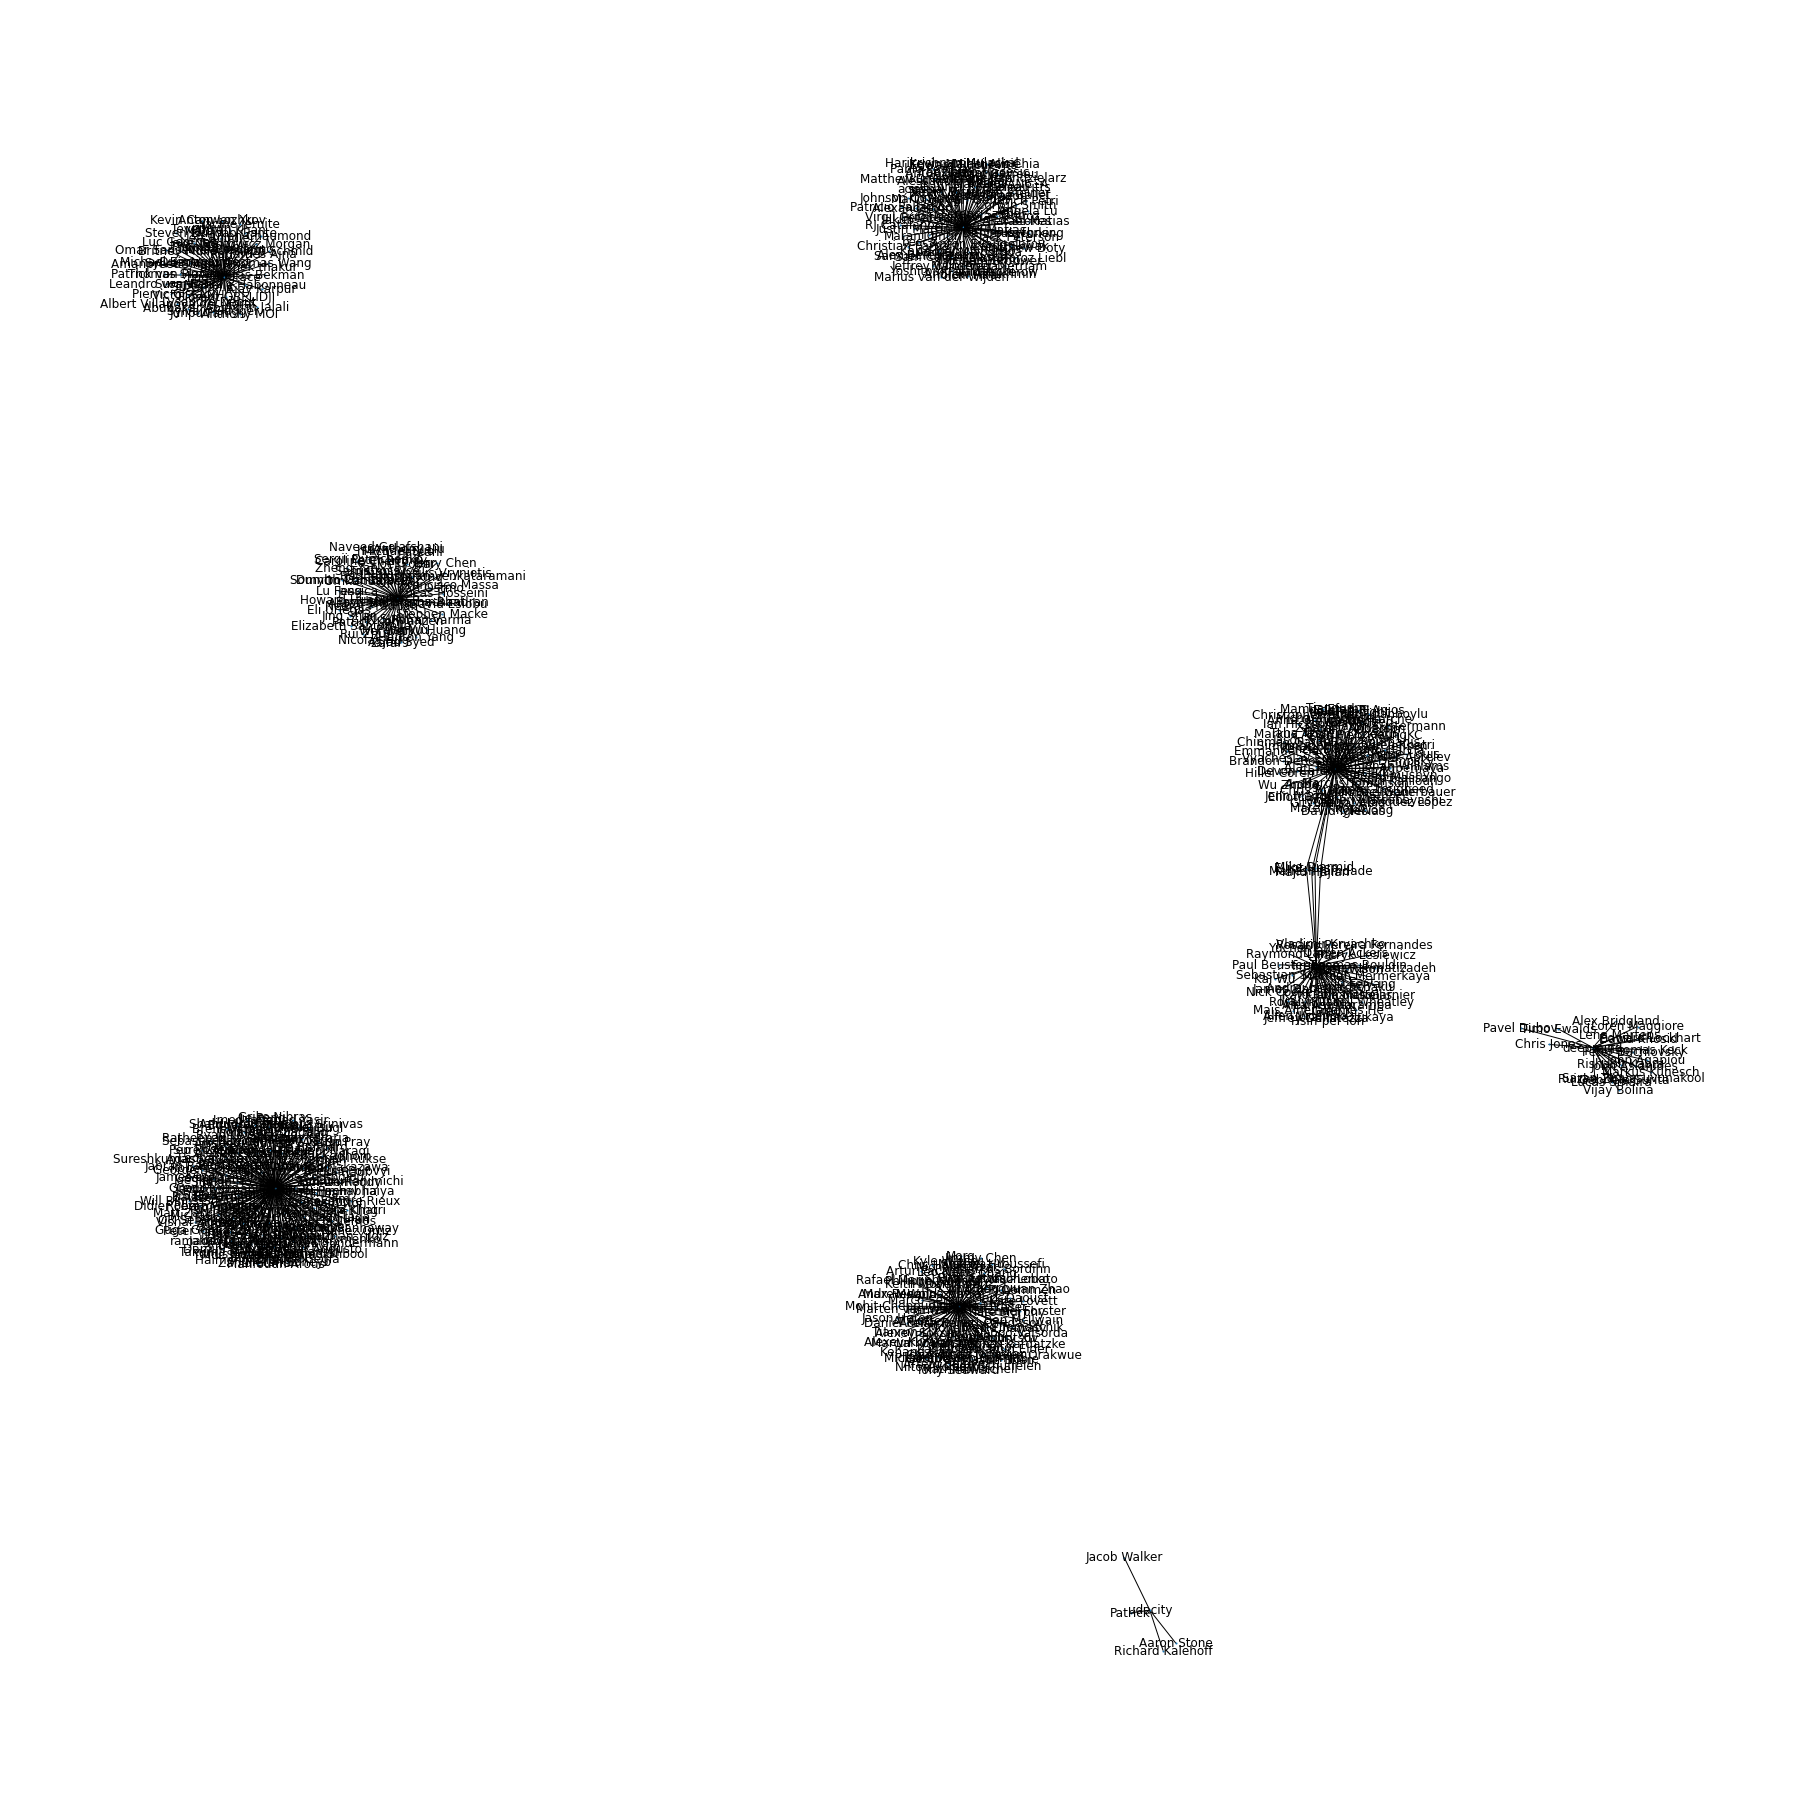

In [ ]:
graph2_n=nx.Graph()
graph2_n.add_nodes_from(data2['Organisation'])
graph2_n.add_nodes_from(data2['member'])
for i in range(len(data2)):
  print()
  graph2_n.add_edges_from([(data2.iloc[i,1],data2.iloc[i,0])])
# nx.draw(graph2_n,with_labels=1)
plt.figure(figsize=(25,25))
nx.draw(graph2_n, with_labels=True, node_size=1)
plt.show()

In [ ]:
nt2 = Network(notebook=True, bgcolor='#3A3B3C', font_color='white')
nt2.from_nx(graph2)
nt2.toggle_physics(True)
nt2.force_atlas_2based()
nt2.show_buttons(filter_=["physics"])
nt2.show('500_data.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [ ]:
nt2 = Network(notebook=True, bgcolor='#3A3B3C', font_color='white')
nt2.from_nx(graph2_n)
nt2.toggle_physics(True)
nt2.force_atlas_2based()
nt2.show_buttons(filter_=["physics"])
nt2.show('500_data_n.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Interested

In [ ]:
# facebook, reactjs, NVIDIA, nuxt, aws

data['Organisation'].unique()

array(['ethereum', 'pytorch', 'udacity', 'firebase', 'flutter',
       'deepmind', 'reactjs', 'huggingface', 'google', 'docker', 'apache',
       'vuejs', 'freeCodeCamp', 'airbnb', 'golang', 'nodejs', 'elastic',
       'laravel', 'aws', 'Azure', 'reduxjs', 'NVIDIA', 'redis', 'rails',
       'grafana', 'jquery', 'ansible', 'graphql', 'babel', 'atom',
       'prometheus', 'django', 'opencv', 'mongodb', 'python', 'bitcoin',
       'plotly', 'serverless', 'nuxt', 'facebook', 'microsoft'],
      dtype=object)

In [ ]:
interested = ['facebook', 'reactjs', 'NVIDIA', 'nuxt', 'aws', 'google', 'golang']

In [ ]:
df_interested = data.where(data['Organisation'].isin(interested))
df_interested = df_interested.dropna(axis = 0, how = 'all')
df_interested.reset_index()

,index,Organisation,member
0,273,reactjs,Imed Jaberi
1,274,reactjs,Aissaoui Ahmed
2,275,reactjs,Greg Myers
3,276,reactjs,Bunhouth
4,277,reactjs,Bunlong VAN
...,...,...,...
1289,6231,facebook,Andres Suarez
1290,6232,facebook,Jetsada Machom
1291,6233,facebook,Ziyad Bazed
1292,6234,facebook,Paul O’Shannessy


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40527 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24034 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40527 missing from current font.
  font.set_te

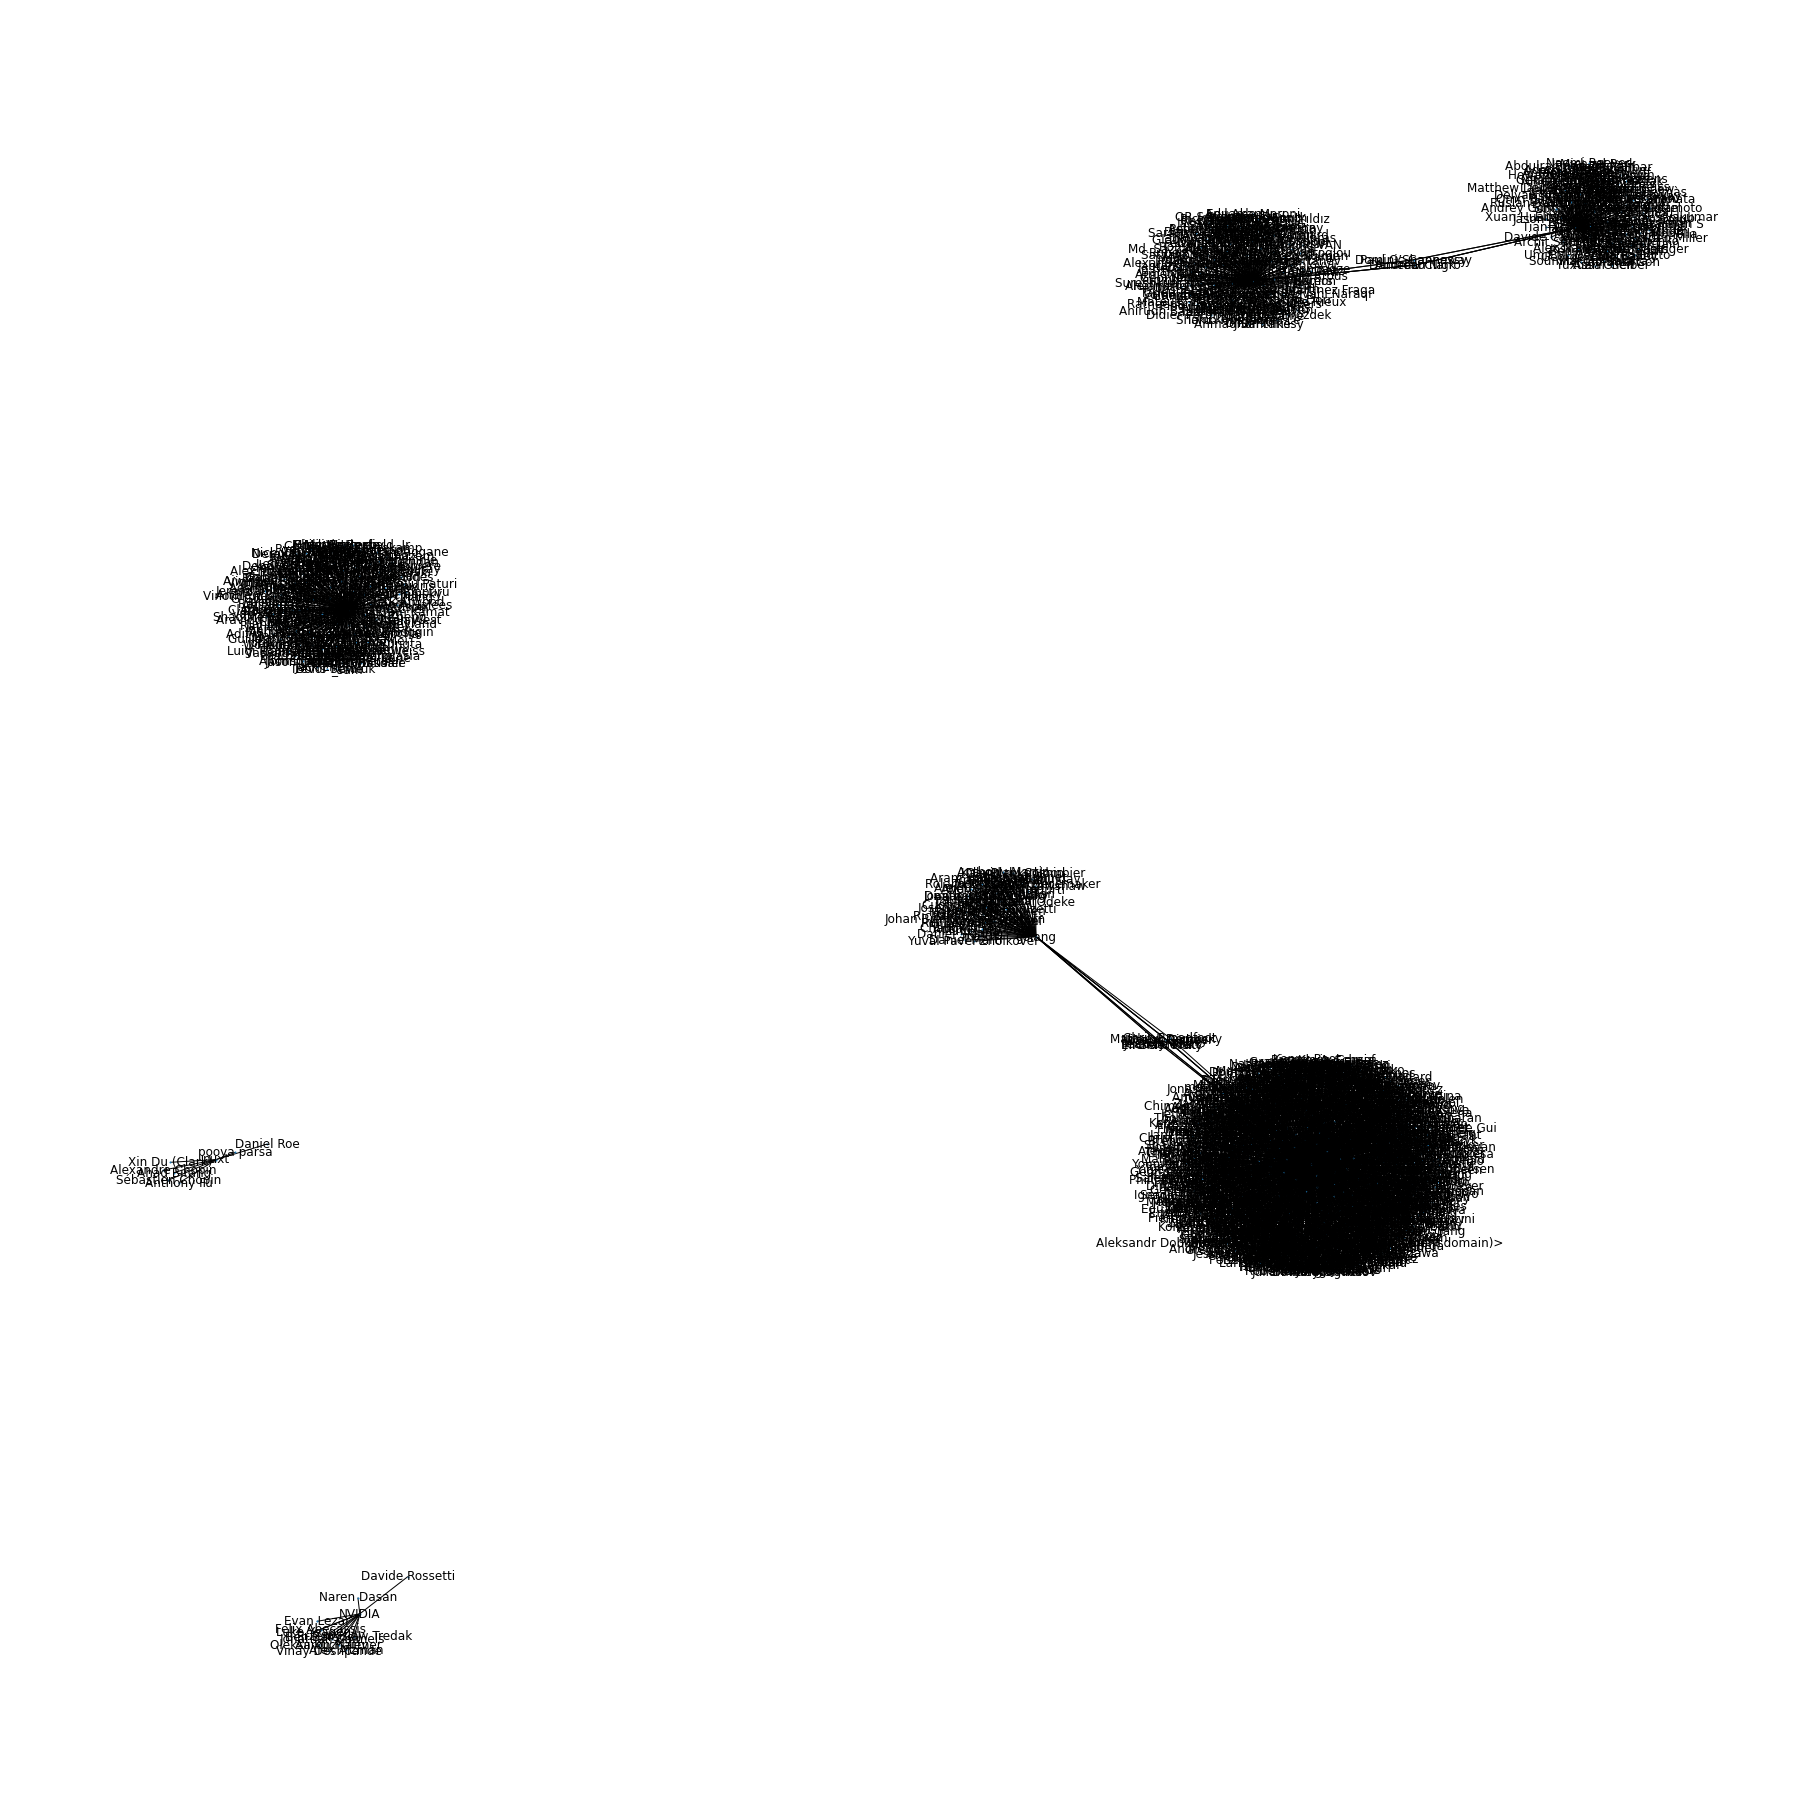

In [ ]:
graph_interested=nx.Graph()
graph_interested.add_nodes_from(df_interested['Organisation'],bipartite=0)
graph_interested.add_nodes_from(df_interested['member'],bipartite=1)
for i in range(len(df_interested)):
  print()
  graph_interested.add_edges_from([(df_interested.iloc[i,1],df_interested.iloc[i,0])])
# nx.draw(graph_interested,with_labels=1)
plt.figure(figsize=(25,25))
nx.draw(graph_interested, with_labels=True, node_size=1)
plt.show()

In [ ]:
nt3 = Network(notebook=True, bgcolor='#3A3B3C', font_color='white')
nt3.from_nx(graph_interested)
nt3.toggle_physics(True)
nt3.force_atlas_2based()
nt3.toggle_physics(False)
nt3.show_buttons(filter_=["physics"])
nt3.show('nx3.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Analysis Interested

In [ ]:
def sort_dict(input):
  return dict(sorted(input.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# page rank
pr = nx.pagerank(graph_interested, alpha=0.9)
pr_sorted = sort_dict(pr)
list(pr_sorted.items())[:5]

[('google', 0.29349016656727717),
 ('aws', 0.06215504462820502),
 ('reactjs', 0.050200466921470045),
 ('facebook', 0.0388260886653768),
 ('golang', 0.021203989781147892)]

In [ ]:
# centrality
# degree_centrality

dg_c = nx.degree_centrality(graph_interested)
dg_c_sorted = sort_dict(dg_c)
list(dg_c_sorted.items())[:5]

[('google', 0.6231546231546231),
 ('aws', 0.13053613053613053),
 ('reactjs', 0.10722610722610723),
 ('facebook', 0.08313908313908314),
 ('golang', 0.046620046620046623)]

In [ ]:
# closeness
c_c = nx.closeness_centrality(graph_interested)
c_c = sort_dict(c_c)
c_c

{'google': 0.591673951048951,
 'Chris Broadfoot': 0.33255678747482026,
 'Cody Oss': 0.33255678747482026,
 'Eli Bendersky': 0.33255678747482026,
 'Jean de Klerk': 0.33255678747482026,
 'Joseph Richey': 0.33255678747482026,
 'Matthew Dempsky': 0.33255678747482026,
 'Nicolas Garnier': 0.33255678747482026,
 'Michael Pratt': 0.33255678747482026,
 'Mohit Cheppudira': 0.31312403142612627,
 'Paweł Kępka': 0.31312403142612627,
 'Andrew Woloszyn': 0.31312403142612627,
 'Adrian Perez': 0.31312403142612627,
 'Al Cutter': 0.31312403142612627,
 'Alexey Kurakin': 0.31312403142612627,
 'Anash P. Oommen': 0.31312403142612627,
 'Andiry Xu': 0.31312403142612627,
 'Artem Belevich': 0.31312403142612627,
 'Juanli Shen': 0.31312403142612627,
 'Yilun Chong': 0.31312403142612627,
 'Benjamin Elder': 0.31312403142612627,
 'Eric Chang': 0.31312403142612627,
 'Chengyuan Zhao': 0.31312403142612627,
 'Chimdindu Denalex Orakwue': 0.31312403142612627,
 'Antonio Lobato': 0.31312403142612627,
 'Conchylicultor': 0.313124

In [ ]:
import itertools

comm = []

k = 7
i = 0 
comp = community.girvan_newman(graph_interested)
for communities in itertools.islice(comp, k):
  comm.append([])
  for c in communities:
    comm[i].append(c)
  i += 1

In [ ]:
np.array(comm).shape

<ipython-input-30-49554284c6ee>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(comm).shape


(7,)

In [ ]:
for c in comm:
  print(len(c))

6
7
8
9
10
11
12


In [ ]:
co = np.array(comm[1])

for c in comm[1]:
  # print(list(c)[::-5])
  print(list(c))

['Mateusz Zatorski', 'Aissaoui Ahmed', 'Jordan W', 'Soichiro Miki', 'Tyler McGinnis', 'Jim', 'Sureshkumar Selvanayagam', 'Ratheepan Jayakkumar', 'Phil', 'Alexey Pyltsyn', 'Bunhouth', 'Ryan Le', 'Bunlong VAN', 'Leonard Lacson', 'Resi Respati', 'Rick Beerendonk', 'Jayan', 'Shakib Hossain', 'Max Stoiber', 'Pavinthan', 'Austin Pray', 'Shalva Gegia', 'Daniel Bugl', 'Alexandre Rieux', 'Herormo', 'Ashrith Reddy', 'Haimeng Zhang', 'Haegul Pyun', 'Agastya Darma', 'Didier Peran Ganthier', 'QiChang Li', 'Abdul Rauf', 'Balázs Orbán', 'Tsukuru Tanimichi', 'Ali Oğuzhan Yıldız', 'Glaucia Lemos', 'Joe Jiang', 'Lee Bannard', 'Farhad Yasir', 'Keyan Zhang', 'Michael Jackson', 'giiorg', 'Samundra Khatri', 'Milos Nikolic', 'Christoph Nakazawa', 'Milan Vasic', 'Armen Nikoyan', 'Jhon Mike', 'Will Binns-Smith', 'C. T. Lin', 'Mohammad Shbool', 'Robert Mosolgo', 'Toru Kobayashi', 'Robert DeLuca', 'Brent Vatne', 'James Gatz', 'Takuma HANATANI', 'Masoud Bahrami', 'Shahul Hameed', 'Zahid Sumon', 'chloe', 'Arshad K

In [ ]:
# betweeness

between = nx.betweenness_centrality(graph_interested)
between_sorted = sort_dict(between)
list(between_sorted.items())[:10]

[('google', 0.4389740206225432),
 ('golang', 0.052077178049184276),
 ('reactjs', 0.027970819572685827),
 ('facebook', 0.0233631928810778),
 ('aws', 0.016951425971643702),
 ('Chris Broadfoot', 0.006364488285172578),
 ('Cody Oss', 0.006364488285172578),
 ('Eli Bendersky', 0.006364488285172578),
 ('Jean de Klerk', 0.006364488285172578),
 ('Joseph Richey', 0.006364488285172578)]

In [ ]:
processed_between = []

for index, (key, value) in enumerate(between_sorted.items()):
  if key not in interested and value != 0:
    processed_between.append((key, value))

processed_between

[('Chris Broadfoot', 0.006364488285172578),
 ('Cody Oss', 0.006364488285172578),
 ('Eli Bendersky', 0.006364488285172578),
 ('Jean de Klerk', 0.006364488285172578),
 ('Joseph Richey', 0.006364488285172578),
 ('Matthew Dempsky', 0.006364488285172578),
 ('Nicolas Garnier', 0.006364488285172578),
 ('Michael Pratt', 0.006364488285172578),
 ('Daniel Lo Nigro', 0.003335665544063685),
 ('Andrew Clark', 0.003335665544063685),
 ('dan', 0.003335665544063685),
 ('Dominic Gannaway', 0.003335665544063685),
 ('Paul O’Shannessy', 0.003335665544063685)]

## Analysis All Data 'Betweeness'

In [ ]:
# betweeness from all data

between_all = nx.betweenness_centrality(B)
between_all_sorted = sort_dict(between_all)

In [ ]:
processed_between_all = []

for index, (key, value) in enumerate(between_all_sorted.items()):
  if key not in list(data['Organisation'].unique()) and value != 0:
    processed_between_all.append((key, value))

processed_between_all

[('Daniel', 0.03972454290640497),
 ('Ryan Wilson', 0.02921219607488707),
 ('Glaucia Lemos', 0.023724403050407284),
 ('Bing Hu', 0.02354607111301818),
 ('Seth', 0.02354607111301818),
 ('Yegor', 0.02354607111301818),
 ('Dr Christian Geuer-Pollmann', 0.022735519330738585),
 ('Sergey Grebnov', 0.022735519330738585),
 ('Strong Liu(刘少壮)', 0.022735519330738585),
 ('Alexander', 0.022681498338142186),
 ('Adam', 0.021906844399227424),
 ('Andrew Hall', 0.016361761564006528),
 ('Leo', 0.016020712608061132),
 ('Toru Nagashima', 0.01253226064810449),
 ('Nathan', 0.01187674233656104),
 ('Tim Barham', 0.01137429855466992),
 ('Arvind Shyamsundar', 0.01137429855466992),
 ('Brian Loss', 0.01137429855466992),
 ('Vishal Mishra', 0.01137429855466992),
 ('Mariia Mykhailova', 0.01137429855466992),
 ('Li Li', 0.01137429855466992),
 ('John Hawthorn', 0.011174896077961497),
 ('Bruno Rocha', 0.010345439086230009),
 ('David Smith', 0.010070883459969862),
 ('Benedikt Meurer', 0.009761739424849787),
 ('Thomas Watson

In [ ]:
data.where(data['member']=='Ryan Wilson').dropna(axis = 0, how = 'all')

,Organisation,member
173,firebase,Ryan Wilson
1171,google,Ryan Wilson
6547,microsoft,Ryan Wilson
